<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [7]:
!pip install -q jmd_imagescraper


from pathlib import Path
root = Path().cwd()/"dataset"

from jmd_imagescraper.core import * 

duckduckgo_search(root, "Deepika Padukone", "Deepika Padukone", max_results=500)

Duckduckgo search: Deepika Padukone


[WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/001_28f28509.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/002_d127bfd4.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/003_ab06d517.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/004_88578b8a.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/005_e6975ceb.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/006_91d39c5c.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/007_d434bc8c.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/Deepika Padukone/008_829bde18.jpg'),
 WindowsPath('C:/Users/Babita Ratudi/Desktop/Sem_6_Mini_Project/model/dataset/De

In [8]:
!pip install opencv-python
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [11]:
img = cv2.imread('./test_images/Salman khan.jpg')
img.shape

(591, 474, 3)

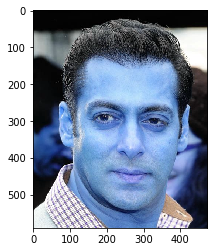

In [12]:
plt.imshow(img)

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(591, 474)

In [14]:
gray

array([[  3,   3,   3, ...,   4,   4,   4],
       [  3,   3,   3, ...,   4,   4,   4],
       [  3,   3,   3, ...,   4,   4,   4],
       ...,
       [253, 254, 243, ...,  10,   2,  15],
       [244, 253, 244, ...,  10,  24,  59],
       [236, 254, 248, ...,  10,  11,  59]], dtype=uint8)

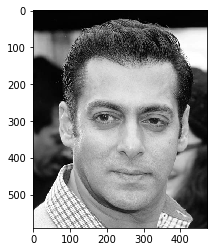

In [15]:
plt.imshow(gray, cmap='gray')

In [16]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 71, 157, 365, 365]], dtype=int32)

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(71, 157, 365, 365)

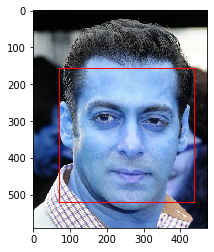

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

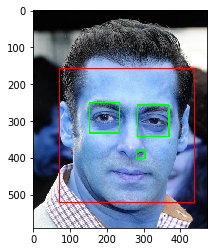

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

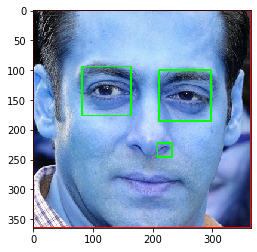

In [20]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

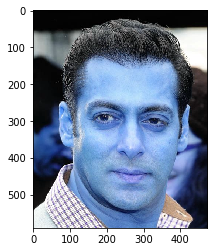

In [23]:
original_image = cv2.imread('./test_images/Salman khan.jpg')
plt.imshow(original_image)

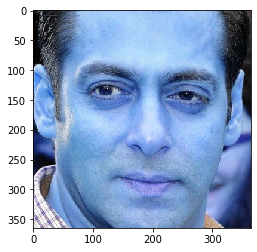

In [25]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Salman khan.jpg')
try:
    cropped_image.shape
    plt.imshow(cropped_image)
except:
    print('0')


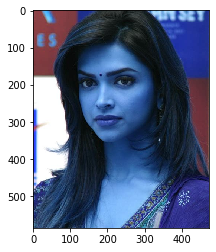

In [34]:
org_image_obstructed = cv2.imread('./test_images/Deepika Padukone.jpg')
plt.imshow(org_image_obstructed)

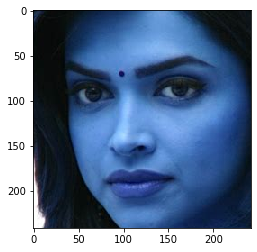

In [35]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Deepika Padukone.jpg')
try:
    cropped_image_no_2_eyes.shape
    plt.imshow(cropped_image_no_2_eyes)
except:
    print('0')



In [36]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [37]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [38]:
img_dirs

['./dataset/Alia Bhatt',
 './dataset/Deepika Padukone',
 './dataset/Salman khan',
 './dataset/Shahrukh Khan']

In [39]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [40]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Alia Bhatt
Generating cropped images in folder:  ./dataset/cropped/Alia Bhatt
Deepika Padukone
Generating cropped images in folder:  ./dataset/cropped/Deepika Padukone
Salman khan
Generating cropped images in folder:  ./dataset/cropped/Salman khan
Shahrukh Khan
Generating cropped images in folder:  ./dataset/cropped/Shahrukh Khan
